<a href="https://colab.research.google.com/github/Alirezabln/TensorflowPractice/blob/main/Binary_Classification_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reserve_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    reserve_word_index.get(i - 3, "?") for i in train_data[0])
decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.5091 - accuracy: 0.7992 - val_loss: 0.4016 - val_accuracy: 0.8494
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3115 - accuracy: 0.8935 - val_loss: 0.3050 - val_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2291 - accuracy: 0.9186 - val_loss: 0.2792 - val_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1758 - accuracy: 0.9371 - val_loss: 0.2930 - val_accuracy: 0.8795
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1445 - accuracy: 0.9505 - val_loss: 0.2899 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1146 - accuracy: 0.9627 - val_loss: 0.3441 - val_accuracy: 0.8758
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0932 - accuracy: 0.9700 - val_loss: 0.3418 - val_accuracy: 0.8810
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

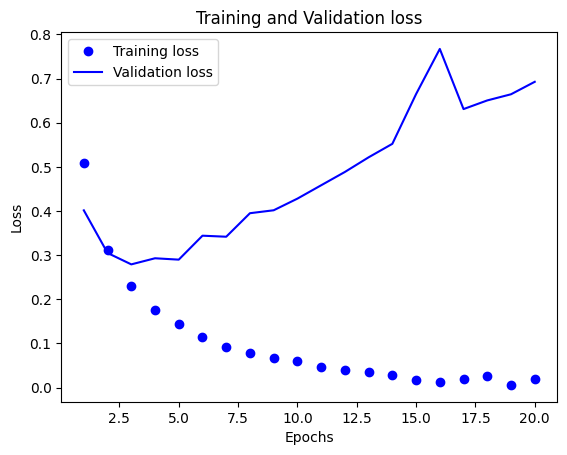

In [ ]:
import matplotlib.pyplot as plt
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

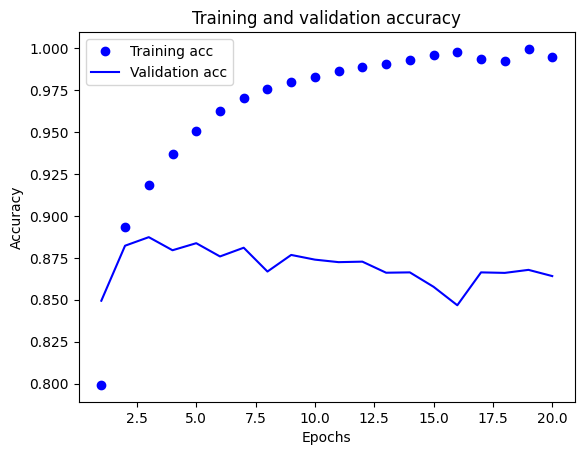

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 2s 22ms/step - loss: 0.4508 - accuracy: 0.8219
Epoch 2/3
49/49 [==============================] - 1s 22ms/step - loss: 0.2609 - accuracy: 0.9049
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2912 - accuracy: 0.8822


In [ ]:
results

[0.2805379033088684, 0.8881999850273132]

In [ ]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.11333317],
       [0.994238  ],
       [0.8074969 ],
       ...,
       [0.05420717],
       [0.0578131 ],
       [0.40731156]], dtype=float32)